# House Price Prediction

- Task: 
    - Build a house price prediction model, and predict the sales price for each house in the test set.
    - On top of the initial requirements, I will explore whether the selection of features affects the training result.
- Data: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
 

## Contents

## 1 - Load the Dataset

### 1.1 Load Common Library

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Load Training and Test Set

In [4]:
# Load training dataset and testing dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df_test.shape

(1459, 80)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 2 - Explore and Process the Dataset
From the info() function, we notice that there're 38 numerical data types and 43 object data types. Additionally, some columns have a significant amount of empty or missing values. Before processing the dataset, I look at the definition of each feature for a better understanding of the dataset and try to group features in my own way.

<details>
  <summary><font size="3" color="SeaGreen"><b>Click to see groups</b></font></summary>
  <p><b>Dwelling-Basic</p></b>
    <ul>
        <li>Plan: MSSubClass, BldgType, HouseStyle, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, BsmtHalfBath, BsmtFullBath, GarageCars</li>
        <li>Design: RoofStyle, RoofMatl, Exterior1st, Exterior2nd, BsmtExposure, GarageType, MasVnrType, Foundation</li>
        <li>Facility: Heating, CentralAir, Electrical, Fireplaces, GarageFinish, PavedDrive</li>
        <li>Rating: OverallQual, OverallCond, ExterQual, ExterCond, BsmtFinType1, BsmtFinType2, BsmtQual, BsmtCond, HeatingQC, GarageQual, GarageCond, FireplaceQu, KitchenQual, Functional</li>
        <li>SF: BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GarageArea, MasVnrArea, GrLivArea, TotRmsAbvGrd</li>
    </ul>
   <p><b>Dwelling-Plus</p></b>
    <ul>
        <li>Facility: MiscFeature, Fence</li>
        <li>Rating: PoolQC</li>
        <li>SF: WoodDeckSF, OpenPorchSF, PoolArea, EnclosedPorch, 3SsnPorch, ScreenPorch</li>
        <li>Value: MiscVal</li>
    </ul>
   <p><b>Zone</p></b>
    <ul>
        <li>MSZoning</li>
        <li>Neighborhood</li>
        <li>Condition1</li>
        <li>Condition2</li>
    </ul>
   <p><b>Land</p></b>
    <ul>
        <li>Feet: LotFrontage</li>
        <li>SF: LotArea</li>
        <li>Type: LotShape, LotConfig, LandContour, LandSlope</li>
    </ul>
   <p><b>Facility / Infrastructure</p></b>
    <ul>
        <li>Street</li>
        <li>Alley</li>
        <li>Utilities</li>
    </ul>
   <p><b>Time</p></b>
    <ul>
        <li>YearBuilt</li>
        <li>YearRemodAdd</li>
        <li>GarageYrBlt</li>
        <li>MoSold</li>
        <li>YrSold</li>
    </ul>
   <p><b>Sale</p></b>
    <ul>
        <li>SaleType</li>
        <li>SaleCondition</li>
    </ul>
</details>  

### 2.1 Review SalePrice
Let's take a closer look at SalePrice before delving into the whole dataset:
- Distribution of SalePrice
- Correlation of SalePrice and other features

In [11]:
# Summary of SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

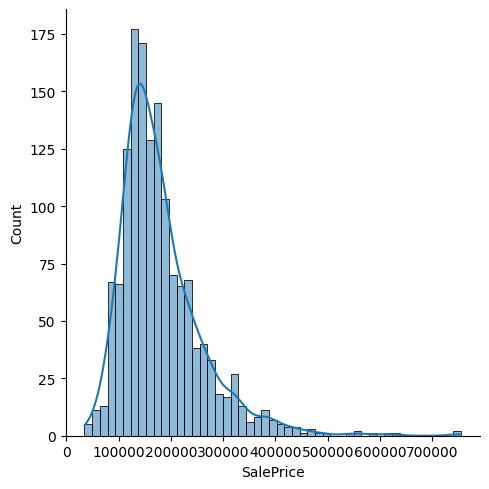

In [12]:
# Distribution of SalePrice
sns.displot(df_train['SalePrice'], kde = True);

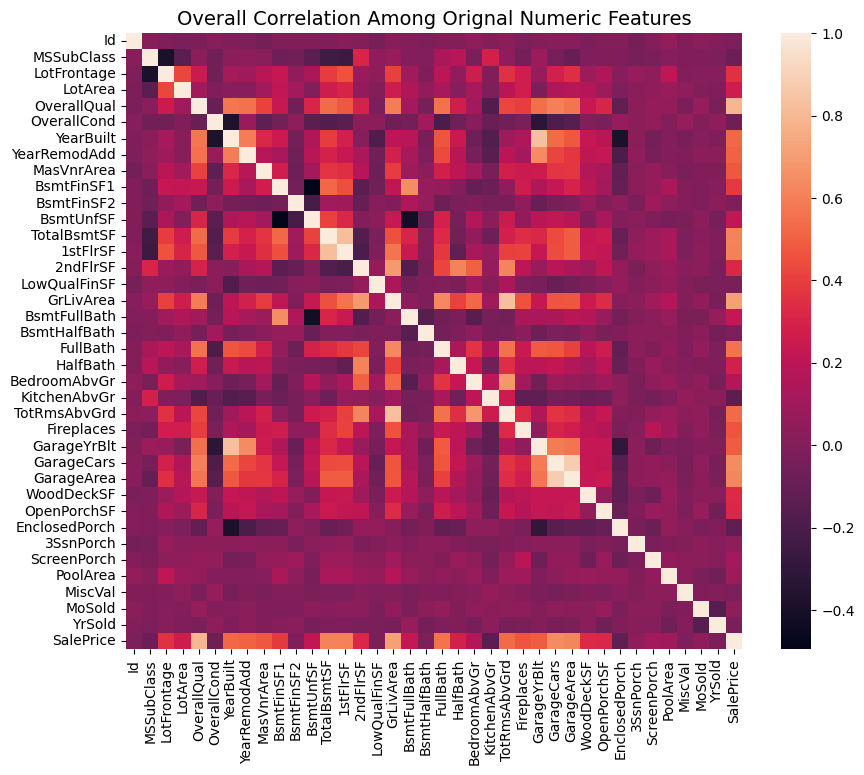

In [13]:
# Correlation matrix of df_train
corrmat = df_train.select_dtypes(include = np.number).corr()

# Plot heatmap
f, ax = plt.subplots(figsize = (10, 8))
plt.title('Overall Correlation Among Orignal Numeric Features', fontsize = 14)
sns.heatmap(corrmat, vmax = 1, square = True);

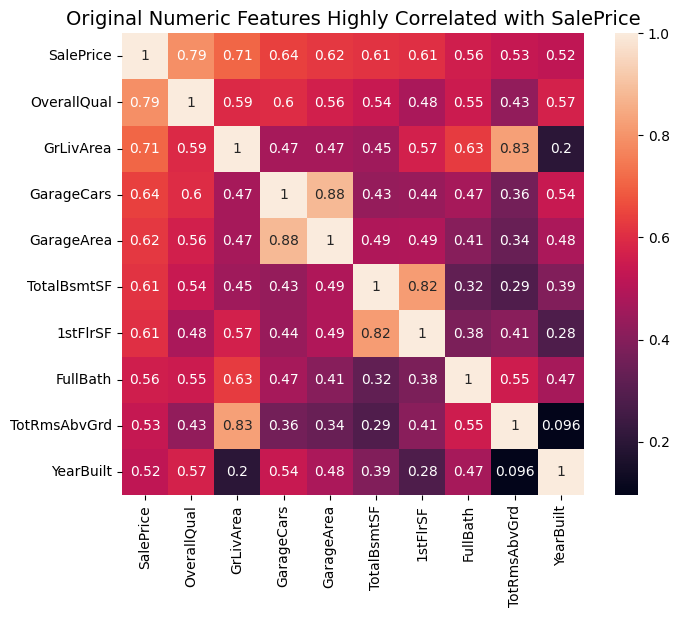

In [14]:
# Correlation matrix of df_train
corrmat = df_train.select_dtypes(include = np.number).corr()

# Number of variables for heatmap
k = 10

# k attributes that are highly correlated to SalePrice 
cols_high_corr = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Plot heatmap
f, ax = plt.subplots(figsize = (8, 6))
plt.title('Original Numeric Features Highly Correlated with SalePrice', fontsize = 14)
sns.heatmap(df_train[cols_high_corr].corr(), vmax = 1, annot = True, square = True);

- Findings: According to the first heatmap above, it is easy to find out which numerical attributes having stronger correlation with SalePrice. In the second correlation graph, it exclusively illustrates the top K attributes (including SalePrice itself) that show a stronger correlation with SalePrice.

### 2.2 Plots for Each Raw Data

<details>
  <summary><font size="3" color="SeaGreen"><b>Click to see a summary of this section</b></font></summary>
  <p><b>Object features that seem to have stronger correlation to SalePrice: </p></b>
    <ul>
        <li>HouseStyle</li>
        <li>BsmtExposure</li>
        <li>ExterQual</li>
        <li>BsmtQual</li>
        <li>HeatingQC</li>
        <li>FireplaceQu</li>
        <li>KitchenQual</li>
        <li>GarageFinish</li>
        <li>MSZoning</li>
        <li>Neighborhood</li>
        <li>Alley</li>
    </ul>
   <p><b>Further feature engineering on features: </p></b>
    <ul>
        <li>Number of bath: FullBath, HalfBath, BsmtHalfBath, BsmtFullBath</li>
        <li>Building size: GrLivArea, 1stFlrSF, GarageArea</li>
    </ul>
</details>  

**Dwelling-Basic**

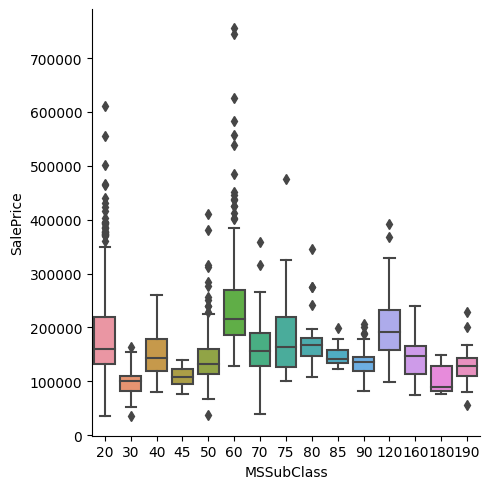

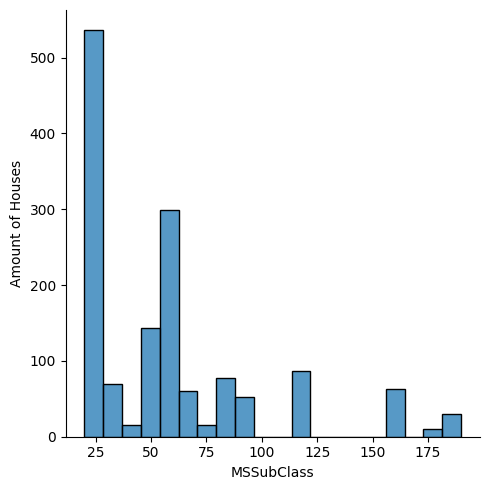

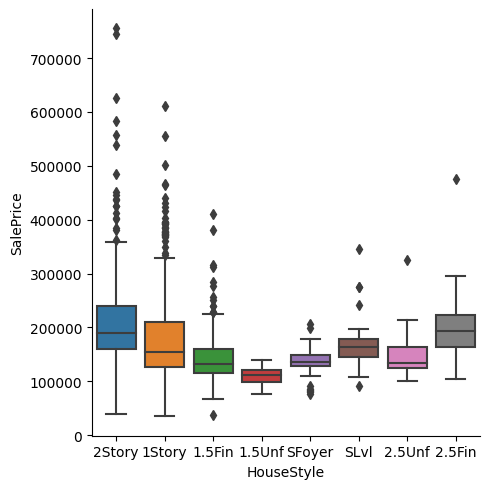

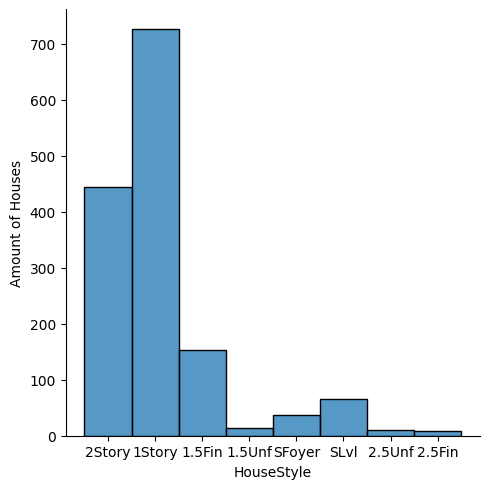

In [15]:
# Plan: MSSubClass, BldgType, HouseStyle
sns.catplot(data = df_train, x = "MSSubClass", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['MSSubClass']).set_axis_labels("MSSubClass", "Amount of Houses")
plt.show();

sns.catplot(data = df_train, x = "HouseStyle", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['HouseStyle']).set_axis_labels("HouseStyle", "Amount of Houses")
plt.show();

# sns.catplot(data = df_train, x = "BldgType", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['BldgType']).set_axis_labels("BldgType", "Amount of Houses")
# plt.show();

Text(0, 0.5, 'SalePrice')

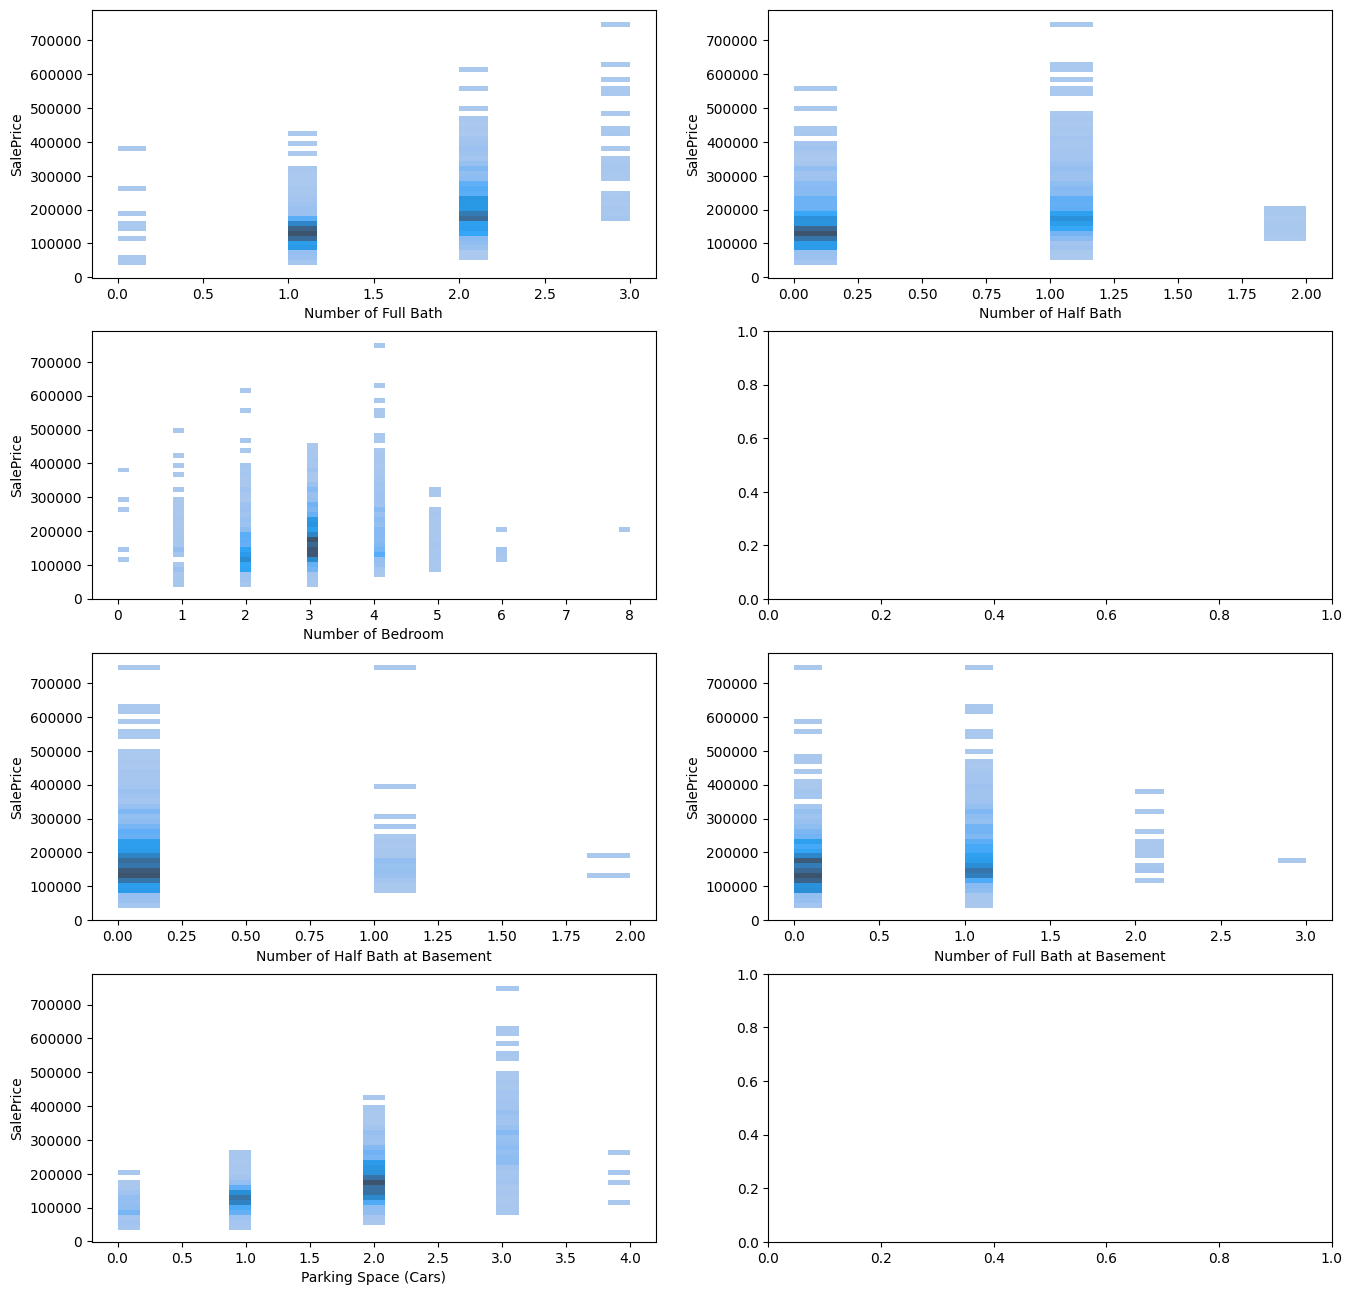

In [16]:
# Plan: FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, BsmtHalfBath, BsmtFullBath, GarageCars
f, axes = plt.subplots(4, 2, figsize = (16, 16))

sns.histplot(data = df_train, x = "FullBath",  y = "SalePrice", multiple = "stack", ax = axes[0, 0])
axes[0, 0].set_xlabel("Number of Full Bath")
axes[0, 0].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "HalfBath",  y = "SalePrice", multiple = "stack", ax = axes[0, 1])
axes[0, 1].set_xlabel("Number of Half Bath")
axes[0, 1].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "BedroomAbvGr",  y = "SalePrice", multiple = "stack", ax = axes[1, 0])
axes[1, 0].set_xlabel("Number of Bedroom")
axes[1, 0].set_ylabel("SalePrice")

# sns.histplot(data = df_train, x = "KitchenAbvGr",  y = "SalePrice", multiple = "stack", ax = axes[1, 1])
# axes[1, 1].set_xlabel("Number of Kitchen")
# axes[1, 1].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "BsmtHalfBath",  y = "SalePrice", multiple = "stack", ax = axes[2, 0])
axes[2, 0].set_xlabel("Number of Half Bath at Basement")
axes[2, 0].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "BsmtFullBath",  y = "SalePrice", multiple = "stack", ax = axes[2, 1])
axes[2, 1].set_xlabel("Number of Full Bath at Basement")
axes[2, 1].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "GarageCars",  y = "SalePrice", multiple = "stack", ax = axes[3, 0])
axes[3, 0].set_xlabel("Parking Space (Cars)")
axes[3, 0].set_ylabel("SalePrice")

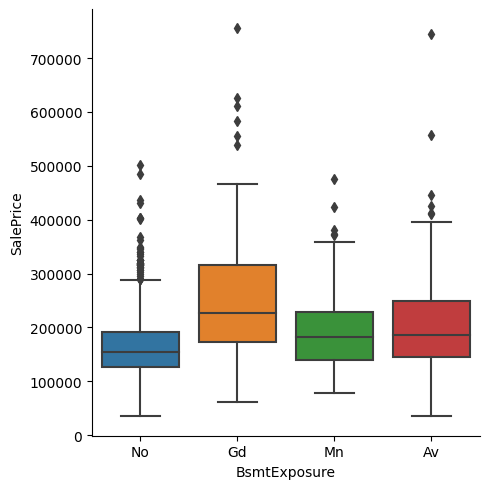

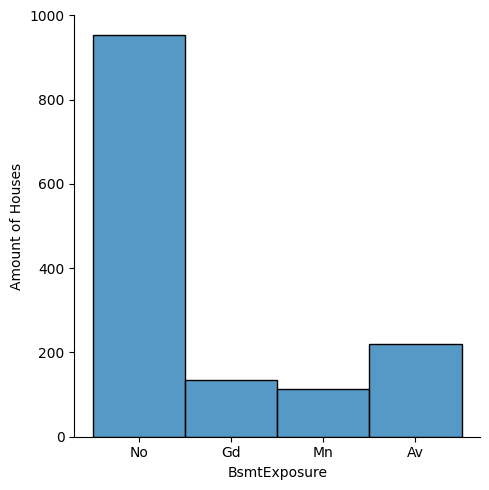

In [17]:
# Design: RoofStyle, RoofMatl, Exterior1st, Exterior2nd, BsmtExposure, GarageType, MasVnrType, Foundation

# sns.catplot(data = df_train, x = "RoofStyle", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['RoofStyle']).set_axis_labels("RoofStyle", "Amount of Houses")
# plt.show();

# sns.catplot(data = df_train, x = "RoofMatl", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['RoofMatl']).set_axis_labels("RoofMatl", "Amount of Houses")
# plt.show();

# sns.catplot(data = df_train, x = "Exterior1st", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Exterior1st']).set_axis_labels("Exterior1st", "Amount of Houses")
# plt.show();

# sns.catplot(data = df_train, x = "Exterior2nd", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Exterior2nd']).set_axis_labels("Exterior2nd", "Amount of Houses")
# plt.show();

sns.catplot(data = df_train, x = "BsmtExposure", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['BsmtExposure']).set_axis_labels("BsmtExposure", "Amount of Houses")
plt.show();

# sns.catplot(data = df_train, x = "GarageType", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['GarageType']).set_axis_labels("GarageType", "Amount of Houses")
# plt.show();

# sns.catplot(data = df_train, x = "MasVnrType", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['MasVnrType']).set_axis_labels("MasVnrType", "Amount of Houses")
# plt.show();

# sns.catplot(data = df_train, x = "Foundation", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Foundation']).set_axis_labels("Foundation", "Amount of Houses")
# plt.show();

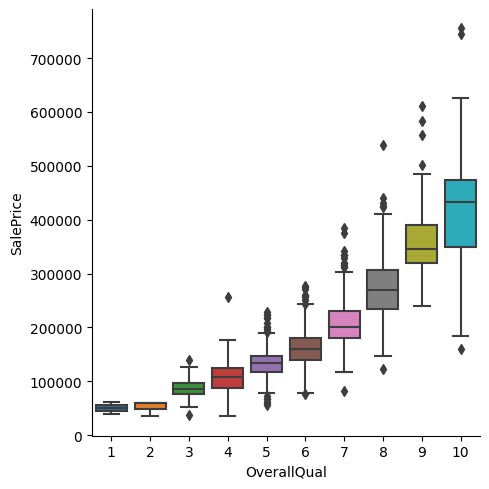

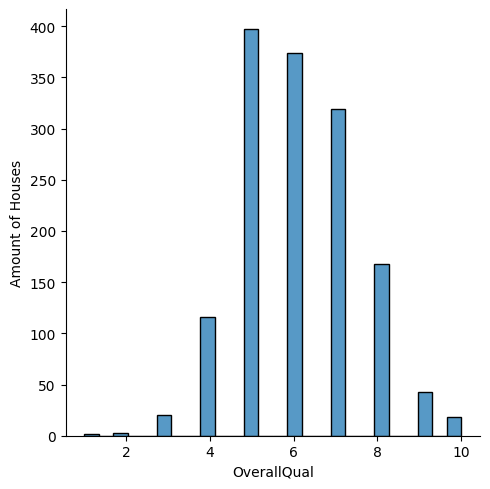

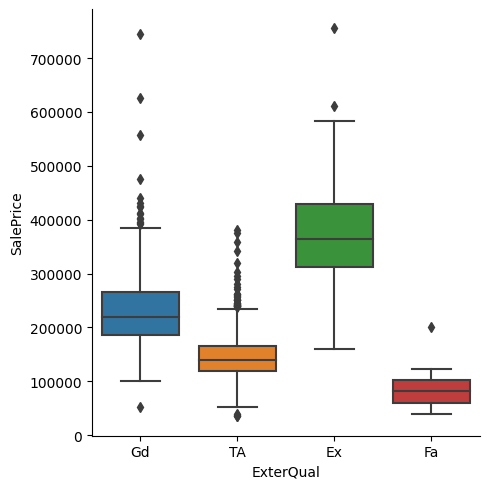

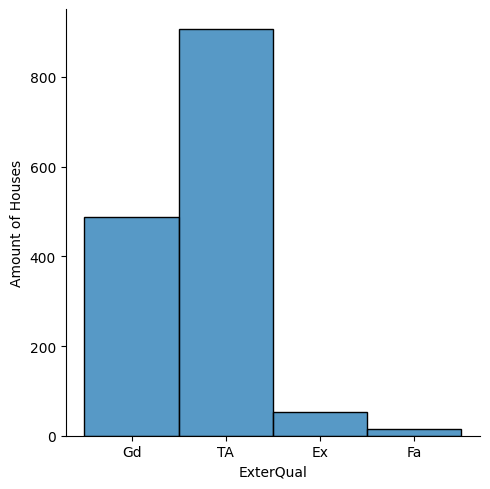

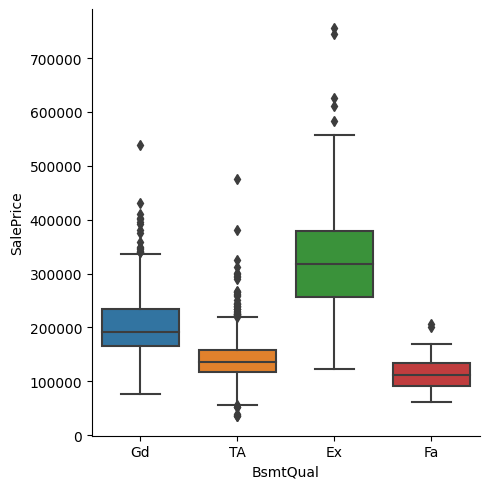

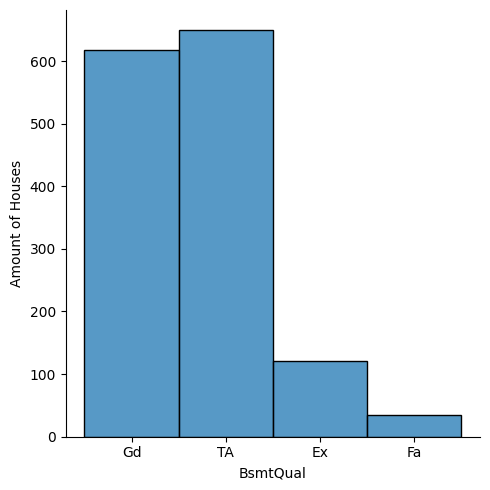

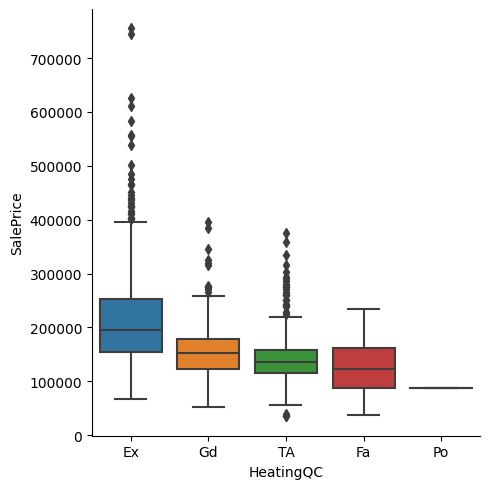

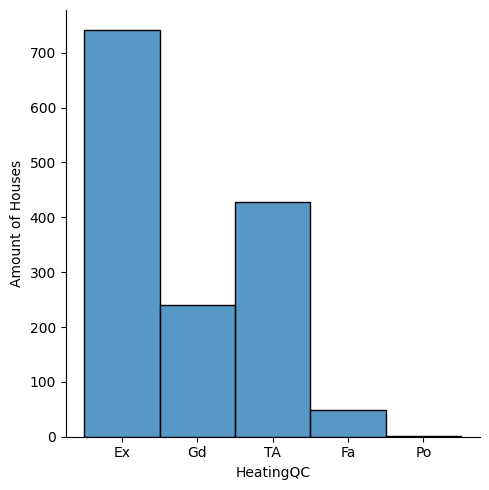

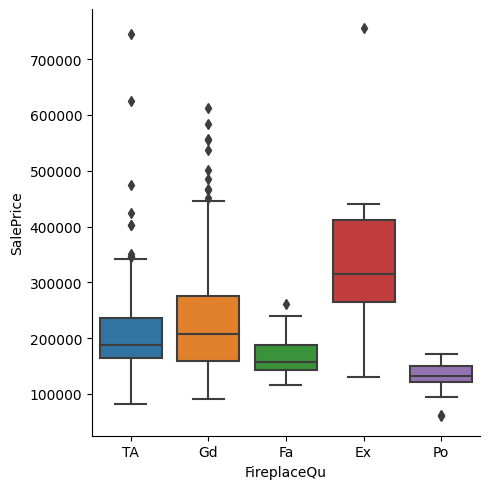

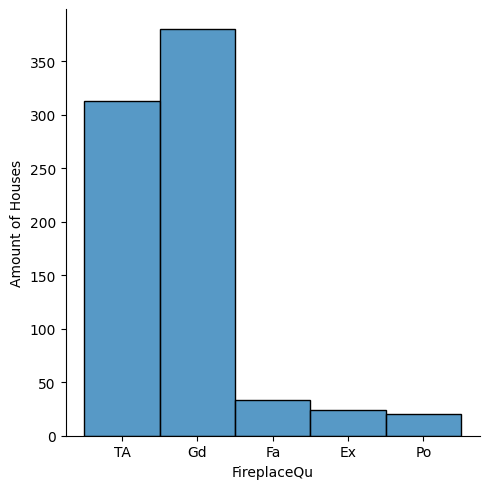

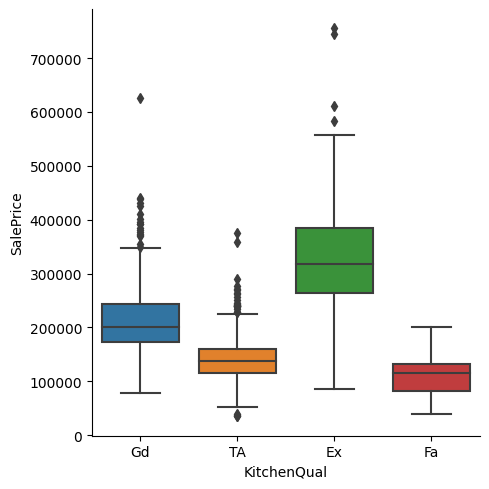

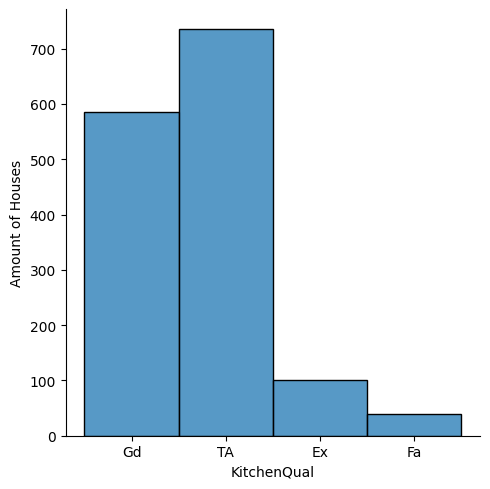

In [251]:
# Rating: OverallQual, OverallCond, ExterQual, ExterCond, BsmtFinType1, BsmtFinType2, BsmtQual, BsmtCond, HeatingQC, GarageQual, GarageCond, FireplaceQu, KitchenQual, Functional
# Note: Not all attributes are plotted, only retain those who have stronger correlation with SalePrice.

sns.catplot(data = df_train, x = "OverallQual", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['OverallQual']).set_axis_labels("OverallQual", "Amount of Houses")
plt.show();

sns.catplot(data = df_train, x = "ExterQual", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['ExterQual']).set_axis_labels("ExterQual", "Amount of Houses")
plt.show();

sns.catplot(data = df_train, x = "BsmtQual", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['BsmtQual']).set_axis_labels("BsmtQual", "Amount of Houses")
plt.show();

# sns.catplot(data = df_train, x = "BsmtCond", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['BsmtCond']).set_axis_labels("BsmtCond", "Amount of Houses")
# plt.show();

sns.catplot(data = df_train, x = "HeatingQC", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['HeatingQC']).set_axis_labels("HeatingQC", "Amount of Houses")
plt.show();

sns.catplot(data = df_train, x = "FireplaceQu", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['FireplaceQu']).set_axis_labels("FireplaceQu", "Amount of Houses")
plt.show();

sns.catplot(data = df_train, x = "KitchenQual", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['KitchenQual']).set_axis_labels("KitchenQual", "Amount of Houses")
plt.show();

> In this part, I keep attributes that seems to influence saleprice, which means the prices tend to rise with higher ratings.\
> For the upcoming graphs, I select attributes that have strong correlation with SalePrice, as identified in previous heatmap.

Text(0, 0.5, 'SalePrice')

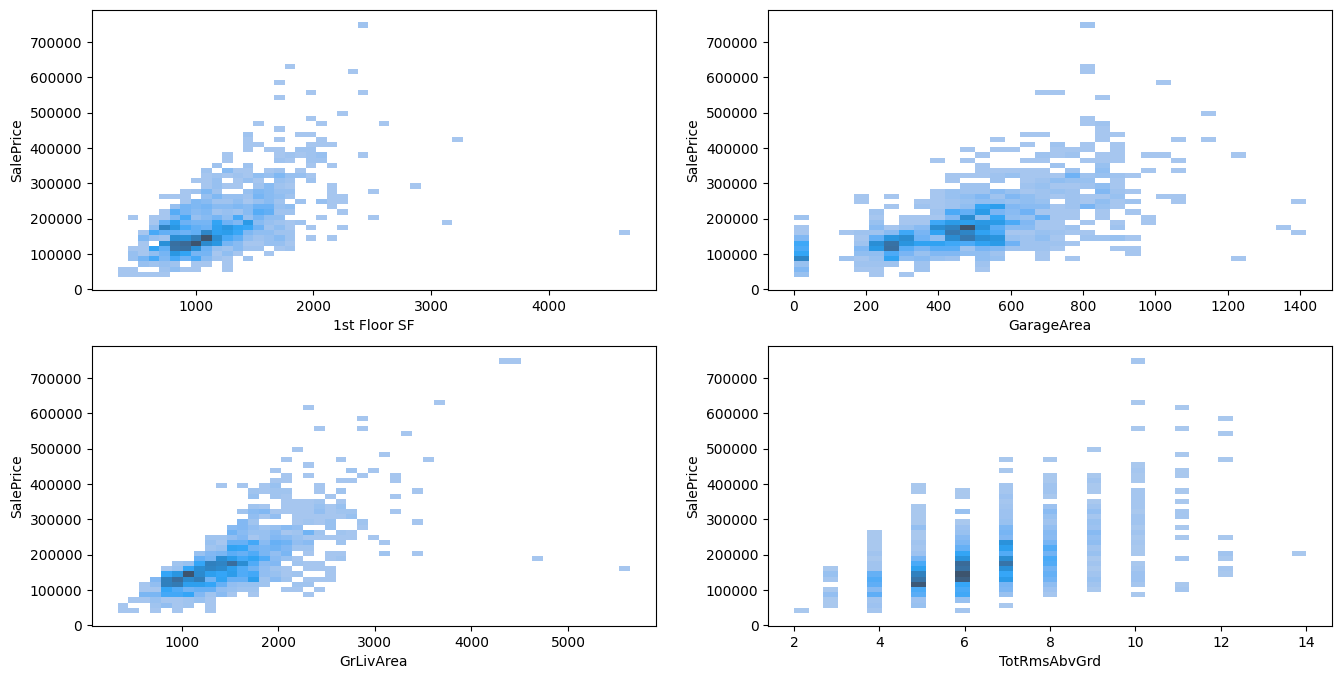

In [18]:
# SF: BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GarageArea, MasVnrArea, GrLivArea, TotRmsAbvGrd
f, axes = plt.subplots(2, 2, figsize = (16, 8))

sns.histplot(data = df_train, x = "1stFlrSF",  y = "SalePrice", multiple = "stack", ax = axes[0, 0])
axes[0, 0].set_xlabel("1st Floor SF")
axes[0, 0].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "GarageArea",  y = "SalePrice", multiple = "stack", ax = axes[0, 1])
axes[0, 1].set_xlabel("GarageArea")
axes[0, 1].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "GrLivArea",  y = "SalePrice", multiple = "stack", ax = axes[1, 0])
axes[1, 0].set_xlabel("GrLivArea")
axes[1, 0].set_ylabel("SalePrice")

sns.histplot(data = df_train, x = "TotRmsAbvGrd",  y = "SalePrice", multiple = "stack", ax = axes[1, 1])
axes[1, 1].set_xlabel("TotRmsAbvGrd")
axes[1, 1].set_ylabel("SalePrice")

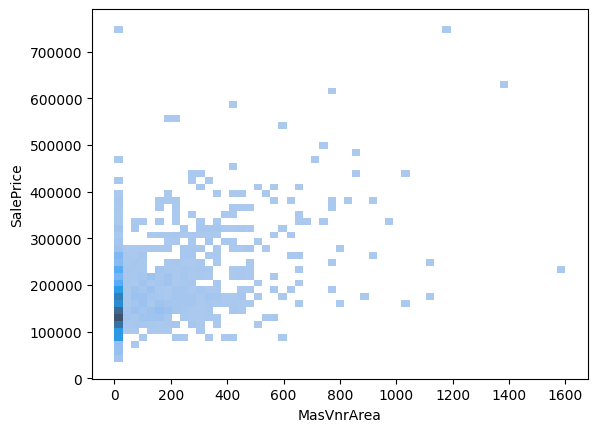

In [19]:
sns.histplot(data = df_train, x = "MasVnrArea",  y = "SalePrice", multiple = "stack")
plt.show()

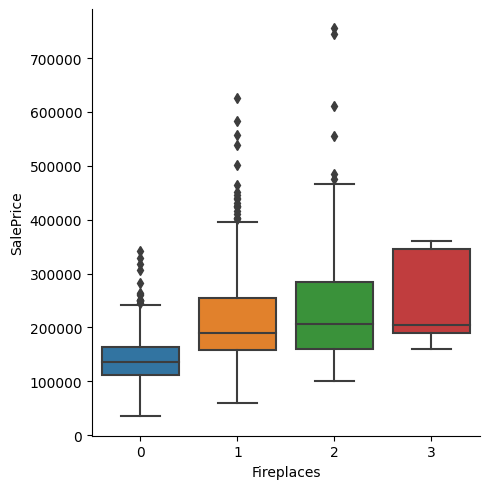

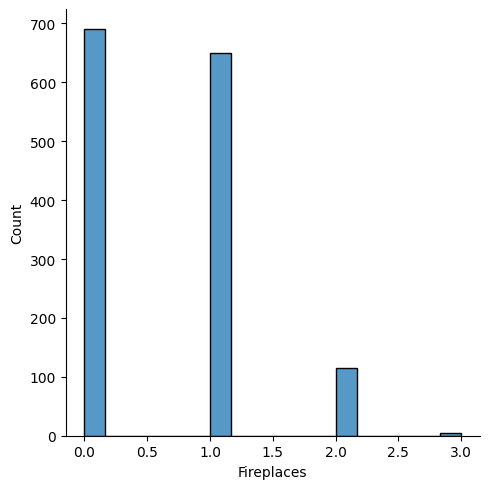

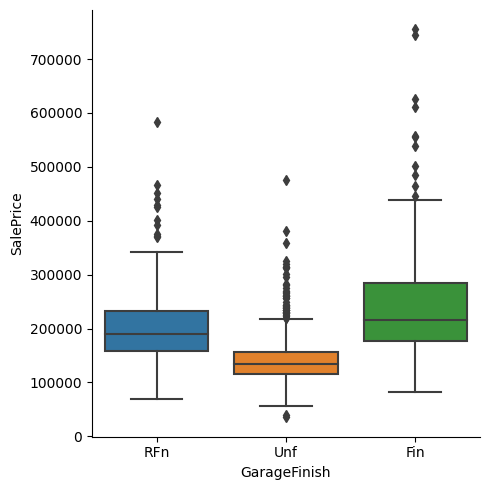

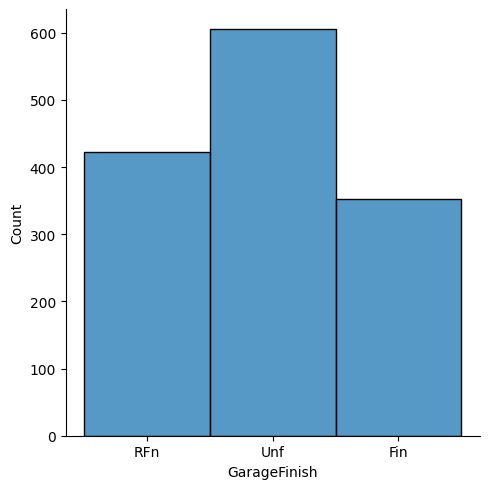

In [20]:
# Facility: Heating, CentralAir, Electrical, Fireplaces, GarageFinish, PavedDrive

# sns.catplot(data = df_train, x = "Heating", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Heating'])
# plt.show();

# sns.catplot(data = df_train, x = "CentralAir", y = "SalePrice", kind = "box")
# plt.show();

# sns.catplot(data = df_train, x = "Electrical", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Electrical'])
# plt.show();

sns.catplot(data = df_train, x = "Fireplaces", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['Fireplaces'])
plt.show();

sns.catplot(data = df_train, x = "GarageFinish", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['GarageFinish'])
plt.show();

# sns.catplot(data = df_train, x = "PavedDrive", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['PavedDrive'])
# plt.show();

**Dwelling-Plus**

In [21]:
# Facility: MiscFeature, Fence
# Rating: PoolQC
# SF: WoodDeckSF, OpenPorchSF, PoolArea, EnclosedPorch, 3SsnPorch, ScreenPorch
# Value: MiscVal

# sns.catplot(data = df_train, x = "MiscFeature", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['MiscFeature'])
# plt.show();

# sns.catplot(data = df_train, x = "Fence", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Fence'])
# plt.show();

# sns.catplot(data = df_train, x = "PoolQC", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['PoolQC'])
# plt.show();

# sns.catplot(data = df_train, x = "MiscVal", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['MiscVal'])
# plt.show();

**Zone**

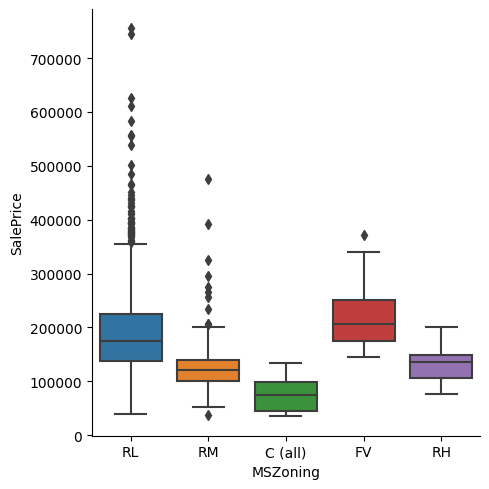

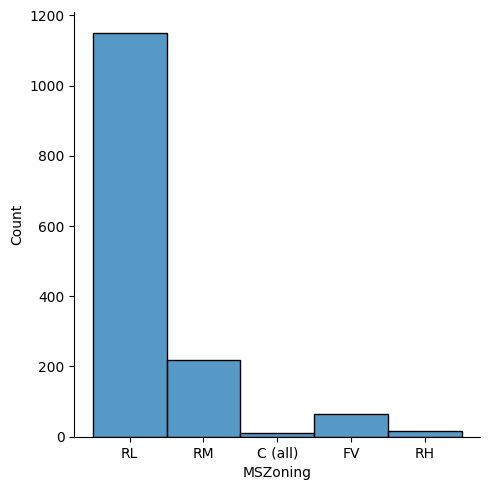

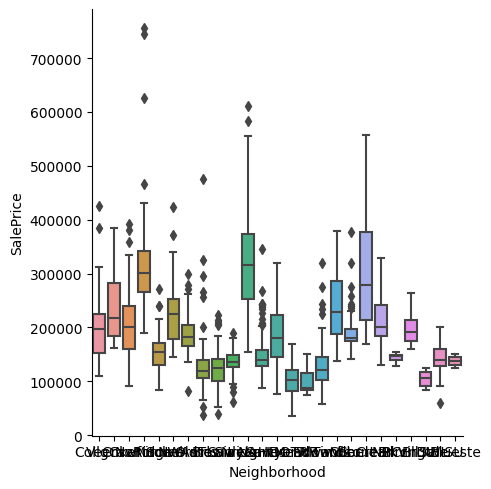

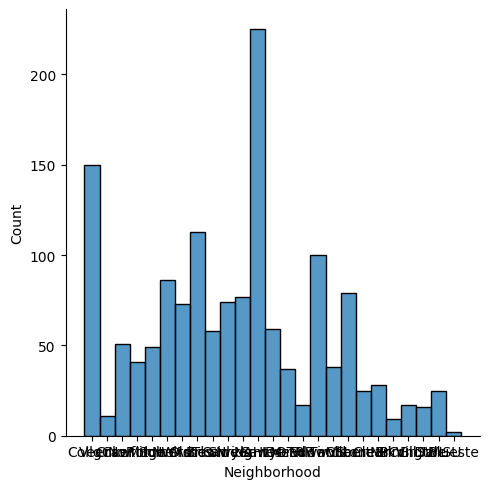

In [22]:
# MSZoning, Neighborhood, Condition1, Condition2
sns.catplot(data = df_train, x = "MSZoning", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['MSZoning'])
plt.show();

sns.catplot(data = df_train, x = "Neighborhood", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['Neighborhood'])
plt.show();

# sns.catplot(data = df_train, x = "Condition1", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Condition1'])
# plt.show();

# sns.catplot(data = df_train, x = "Condition2", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Condition2'])
# plt.show();

> The training dataset lacks MSZoning types "Agriculture", "Industrial", and "Residential Low Density Park", which might cause problem if test dataset includes these zoning type.\
> In general, I won't include "Condition1" and "Condition2" for model training, because the majority of houses are categorized as one specific type.

**Land**

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

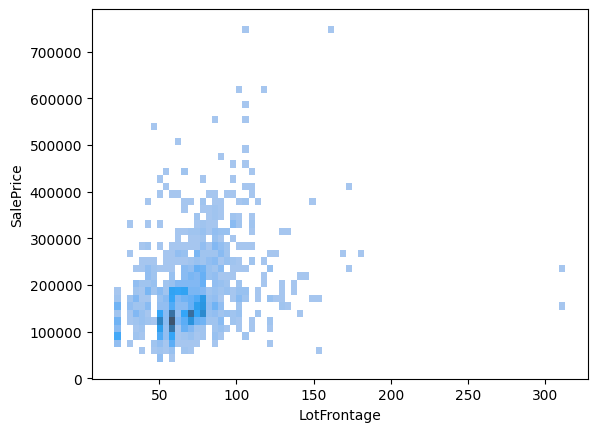

In [23]:
# Feet: LotFrontage
# SF: LotArea
# Type: LotShape, LotConfig, LandContour, LandSlope

sns.histplot(data = df_train, x = "LotFrontage",  y = "SalePrice")

# sns.histplot(data = df_train, x = "LotArea",  y = "SalePrice")

# sns.catplot(data = df_train, x = "LotShape", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['LotShape'])
# plt.show();

# sns.catplot(data = df_train, x = "LotConfig", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['LotConfig'])
# plt.show();

# sns.catplot(data = df_train, x = "LandContour", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['LandContour'])
# plt.show();

# sns.catplot(data = df_train, x = "LandSlope", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['LandSlope'])
# plt.show();


**Facility / Infrastructure**

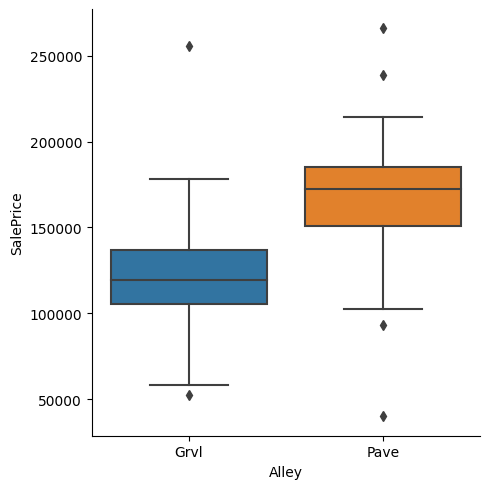

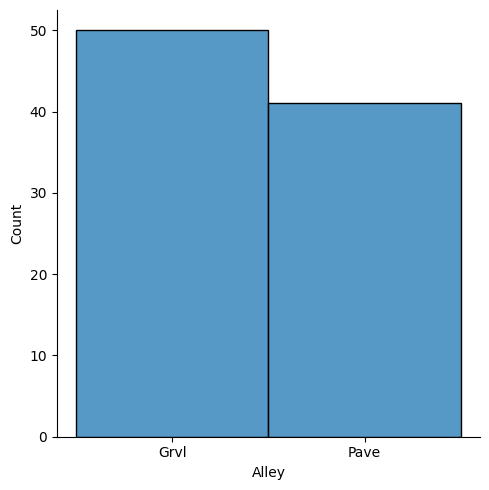

In [24]:
# Street, Alley, Utilities

# sns.catplot(data = df_train, x = "Street", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Street'])
# plt.show();

sns.catplot(data = df_train, x = "Alley", y = "SalePrice", kind = "box")
plt.show();

sns.displot(df_train['Alley'])
plt.show();

# sns.catplot(data = df_train, x = "Utilities", y = "SalePrice", kind = "box")
# plt.show();

# sns.displot(df_train['Utilities'])
# plt.show();

**Time**

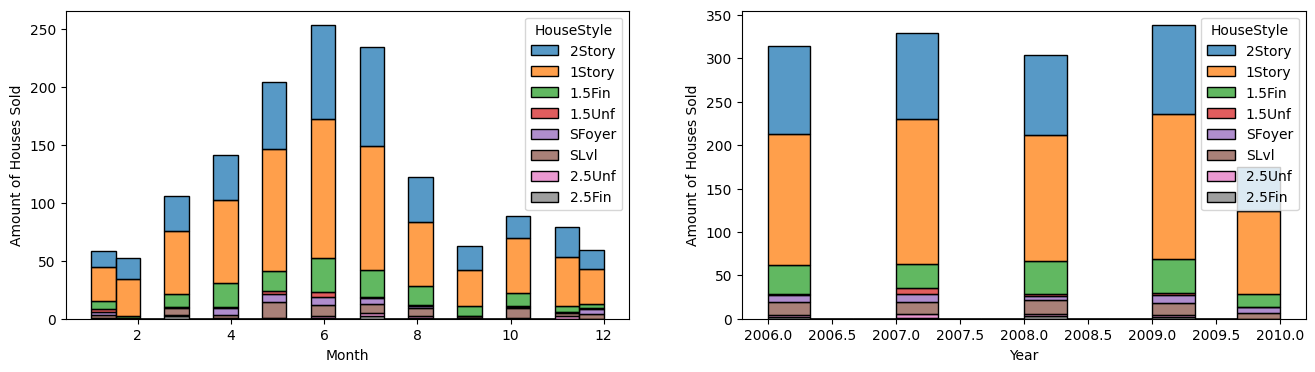

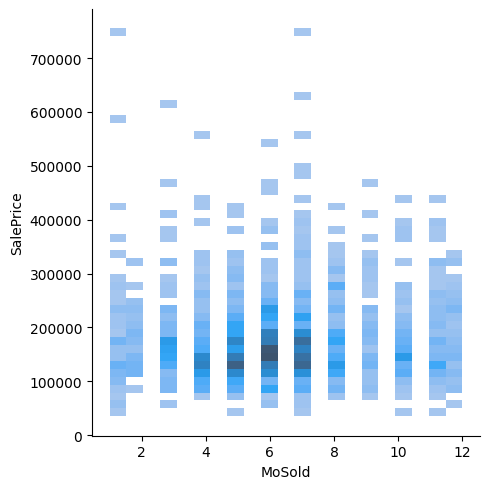

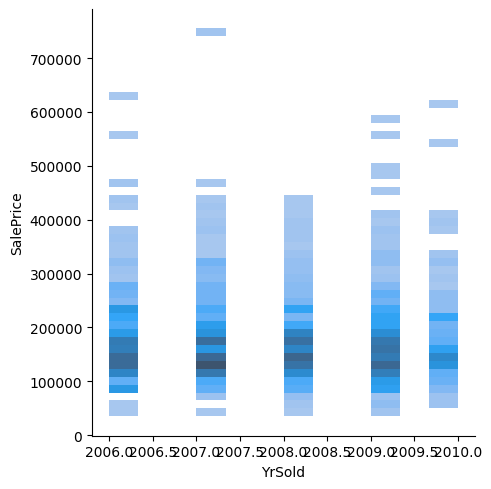

In [25]:
f, axes = plt.subplots(ncols = 2, figsize = (16,4))

sns.histplot(data = df_train, x = "MoSold", hue = "HouseStyle", multiple = "stack", ax = axes[0])
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Amount of Houses Sold")

sns.histplot(data = df_train, x = "YrSold", hue = "HouseStyle", multiple = "stack", ax = axes[1])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Amount of Houses Sold")

plt.show();

sns.displot(data = df_train, x = "MoSold", y = "SalePrice")
plt.show();

sns.displot(data = df_train, x = "YrSold", y = "SalePrice")
plt.show();

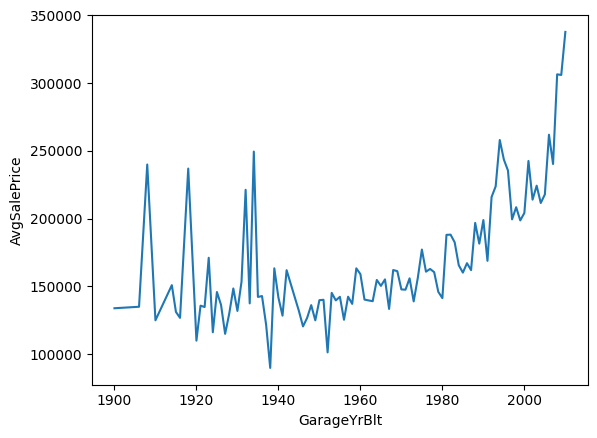

In [26]:
df_mean = df_train.groupby('GarageYrBlt').agg({'SalePrice':['mean']})
df_mean.reset_index(inplace = True)
df_mean.columns = ['GarageYrBlt', 'AvgSalePrice']
# df_mean.head()

# Plot YearBuilt and average SalePrice
sns.lineplot(data = df_mean, x = "GarageYrBlt", y = "AvgSalePrice")
plt.show();

In [27]:
# Check if every YearRemodAdd is always larger than YearBuilt
print("Number of YearRemodAdd predates YearBuilt: ", (df_train["YearRemodAdd"] < df_train["YearBuilt"]).sum())

Number of YearRemodAdd predates YearBuilt:  0


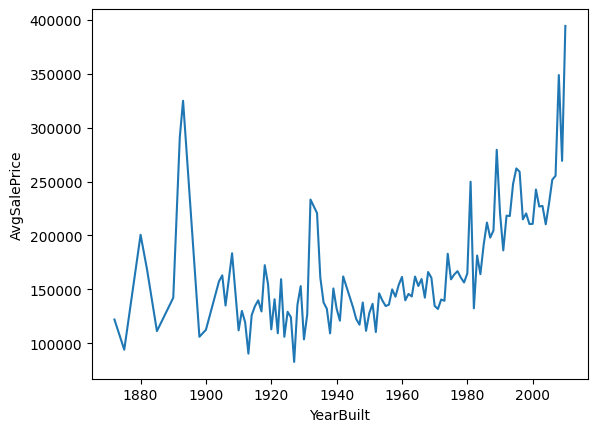

In [28]:
# df_mean_year_built = df_train.groupby(by = 'YearBuilt')['SalePrice'].mean().sort_values(ascending = False)
df_mean = df_train.groupby('YearBuilt').agg({'SalePrice':['mean']})
df_mean.reset_index(inplace = True)
df_mean.columns = ['YearBuilt', 'AvgSalePrice']
# df_mean.head()

# Plot YearBuilt and average SalePrice
sns.lineplot(data = df_mean, x = "YearBuilt", y = "AvgSalePrice")
plt.show();

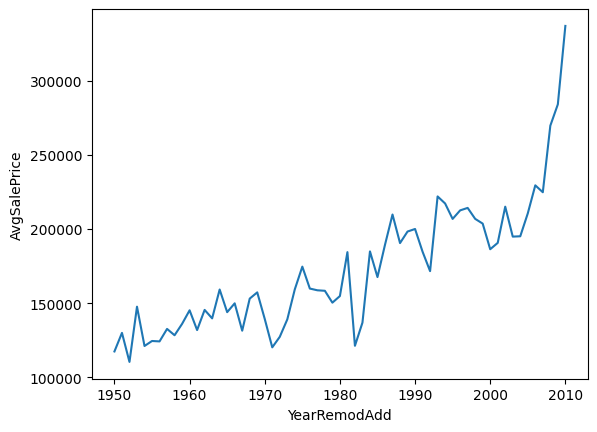

In [29]:
df_mean = df_train.groupby('YearRemodAdd').agg({'SalePrice':['mean']})
df_mean.reset_index(inplace = True)
df_mean.columns = ['YearRemodAdd', 'AvgSalePrice']
# df_mean.head()

# Plot YearRemodAdd and average SalePrice
sns.lineplot(data = df_mean, x = "YearRemodAdd", y = "AvgSalePrice")
plt.show();

# sns.displot(df_train['YearRemodAdd'])
# plt.show();

### 2.3 Handle Duplicates and Missing Data

In [30]:
# Check if there's duplicates
df_train.duplicated().sum()

0

In [31]:
# Check the number of missing data
# Count null numbers and percentage
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)

# List null numbers in order
missing_table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_table.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


Some said that `Theoretically, 25 to 30% is the maximum missing values are allowed`. In this case study, the top 6 features from the above print are going to be dropped from training set for sure. Let's check the rest of features one by one:

**List 1**
- Numeric features: 
    - Size: LotFrontage, MasVnrArea
    - Time: GarageYrBlt
- Object features: 
    - Rating: GarageCond, GarageQual, BsmtCond, BsmtQual
    - Others: GarageType, GarageFinish, BsmtExposure, BsmtFinType2, BsmtFinType1, Electrical

According to the previous section, we select the following **object-typed features** that we are interested in. I remove FireplaceQu and Alley due to a huge amount of null values, and highlight features that overlap with the list 1:

**List 2**
- HouseStyle
- `BsmtExposure`
- ExterQual
- `BsmtQual`
- HeatingQC
- ~~FireplaceQu~~
- KitchenQual
- `GarageFinish`
- MSZoning
- Neighborhood
- ~~Alley~~

Next, we're going to descide how to handle the missing data in the columns `LotFrontage`, `MasVnrArea`, `GarageYrBlt`, `BsmtExposure`, `BsmtQual`, and `GarageFinish`. 
- LotFrontage: Since LotFrontage doesn't appear in the heatmap of top K features, indicating it could have a lesser impact on SalePrice, I'll remove it from the training dataset directly
- MasVnrArea: Fill null values with the mean of the column (?)
- GarageYrBlt: In general, garage is built when or after the main building is finished, so I plan to replace the null values of GarageYrBlt with the value of YearBuilt in the same row.
- BsmtExposure: Fill null values with the most frequent value of the column
- BsmtQual: Fill null values with the most frequent value of the column
- GarageFinish: Fill null values with the most frequent value of the column

In [32]:
# Drop columnns with null values more than 10% of data (LotFrontage included)
df_train = df_train.loc[:, df_train.isnull().sum() < 0.1 * df_train.shape[0]]

In [33]:
# Drop columns with null values we won't use for training
col_drop = ['GarageType', 'BsmtFinType2', 'BsmtFinType1', 'Electrical',
           'GarageCond', 'GarageQual', 'BsmtCond']
df_train = df_train.drop(columns = col_drop)

In [34]:
# Fill null values with the most frequent value of the column for BsmtExposure, BsmtQual and GarageFinish
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].value_counts().index[0])
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].value_counts().index[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train["GarageFinish"].value_counts().index[0])

In [35]:
# Replace the null values of GarageYrBlt with the value of YearBuilt in the same row

# Print original values
print("Before replacement: \n", df_train[df_train['GarageYrBlt'].isnull()][['GarageYrBlt', 'YearBuilt']])

# Replace values with YearBuilt
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['YearBuilt'])

# Print new values
print("\nAfter replacement: \n", df_train.loc[[39]][['GarageYrBlt', 'YearBuilt']])

Before replacement: 
       GarageYrBlt  YearBuilt
39            NaN       1955
48            NaN       1920
78            NaN       1968
88            NaN       1915
89            NaN       1994
...           ...        ...
1349          NaN       1872
1407          NaN       1985
1449          NaN       1970
1450          NaN       1974
1453          NaN       2006

[81 rows x 2 columns]

After replacement: 
     GarageYrBlt  YearBuilt
39       1955.0       1955


In [36]:
# Fill null values with the mean of the column
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [37]:
print("Count null values: \n", df_train.isnull().sum().sort_values(ascending = False))

Count null values: 
 Id              0
GarageYrBlt     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
               ..
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
SalePrice       0
Length: 67, dtype: int64


### 2.4 Encoding of Object Features

I'll make a copy of the training dataset for encoding since later I intend to compare the performance across different feature selections.

In [38]:
import copy

# Copy test dataframe
df_train_en = copy.copy(df_train)

**Ordinal Encoding**\
In this part, I'm going to deal with rating-related features by using ordinal encoding.

In [39]:
# # If encoding process is conducted prior to handling the missing data, 
# # the following code can help to replace nan values with none by adding one more category

# # Find out columns with data type object and have null values
# # Transfer series to dataframe
# col_obj = (df_train_en.select_dtypes(exclude = np.number).isnull().sum() > 0).to_frame()

# # Organize the dataframe
# col_obj.reset_index(inplace = True)
# col_obj.columns = ['Attributes', 'ContainNull']

# # Filter rows of col_obj containing null values
# col_obj = col_obj[col_obj['ContainNull'] == True]

# # Get attributes including null values and make a list
# col_obj = col_obj[col_obj.columns[0]].to_list()

# # Fill Nan Values as None
# for i in col_obj:
#     se = pd.Series(df_train_en[i], dtype = 'category')
#     df_train_en[i] = se.cat.add_categories('None').fillna('None')

# print(df_train_en.select_dtypes(exclude = np.number).isnull().sum())

In [40]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

# Select columns of similar ordinal type
col_ord = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']

# Encode Ordinal Attributes with customized order
enc = OrdinalEncoder(categories = [['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Encode the GarageQual attribute
for i in col_ord:
    df_train_en[i] = enc.fit_transform(asarray(df_train_en[i]).reshape(-1, 1))

# Other ordinal data to be encoded: BsmtExposure
enc = OrdinalEncoder(categories = [['NA', 'No', 'Mn', 'Av', 'Gd']])
df_train_en['BsmtExposure'] = enc.fit_transform(asarray(df_train_en['BsmtExposure']).reshape(-1, 1))

# # Get unique values and counts of each value
# unique, counts = np.unique(df_train_en['GarageQual'], return_counts = True)
# print("Encode Result: \n", np.asarray((unique, counts)).T)

# # Check if the encoding result is the same as we expect
# print("\nCount numbers of each item in column GarageQual:")
# print("None: ", (df_train['GarageQual'] == 'None').sum())
# print("NA: ", (df_train['GarageQual'] == 'NA').sum())
# print("Po: ", (df_train['GarageQual'] == 'Po').sum())
# print("Fa: ", (df_train['GarageQual'] == 'Fa').sum())
# print("TA: ", (df_train['GarageQual'] == 'TA').sum())
# print("Gd: ", (df_train['GarageQual'] == 'Gd').sum())
# print("Ex: ", (df_train['GarageQual'] == 'Ex').sum())

In [151]:
# # Another way to transform ordinal to numerical data by using replace()
# mapper = {"Ex":6, "Gd":5, "TA":4, "Fa":3, "Po":2, "NA":1, "None":0}
# result = df_train["GarageQual"].replace(mapper)

# # Check if the result is the same as we expect
# print("\nCount numbers of each item after replacing:")
# print("None: ", (result == 0).sum())
# print("NA: ", (result == 1).sum())
# print("Po: ", (result == 2).sum())
# print("Fa: ", (result == 3).sum())
# print("TA: ", (result == 4).sum())
# print("Gd: ", (result == 5).sum())
# print("Ex: ", (result == 6).sum())

**Label Encoding**\
For nominal data, I choose label encoder.

In [41]:
# Other nominal data to be encoded: HouseStyle, GarageFinish, MSZoning, Neighborhood, Alley
from sklearn.preprocessing import LabelEncoder

# Create list of nominal data
col_nomi = ['HouseStyle', 'GarageFinish', 'MSZoning', 'Neighborhood']

# Create instance of labelencoder
le = LabelEncoder()

for i in col_nomi:
    # Transfer attribute as category datatype before transform
    df_train_en[i] = df_train_en[i].astype('category')
    # Assigning numerical values and storing in column
    df_train_en[i] = le.fit_transform(df_train_en[i])

In [42]:
print("df_train_en['HouseStyle'] \n", df_train_en['HouseStyle'])
print("\ndf_train['HouseStyle'] \n", df_train['HouseStyle'])

df_train_en['HouseStyle'] 
 0       5
1       2
2       5
3       5
4       5
       ..
1455    5
1456    2
1457    5
1458    2
1459    2
Name: HouseStyle, Length: 1460, dtype: int32

df_train['HouseStyle'] 
 0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object


**Check Correlation with SalePrice**\
After conducting ordinal and nominal features' encoding, let's check the correlation graph again. \
Through the below heatmap, it's obvious that top K attributes have changed.

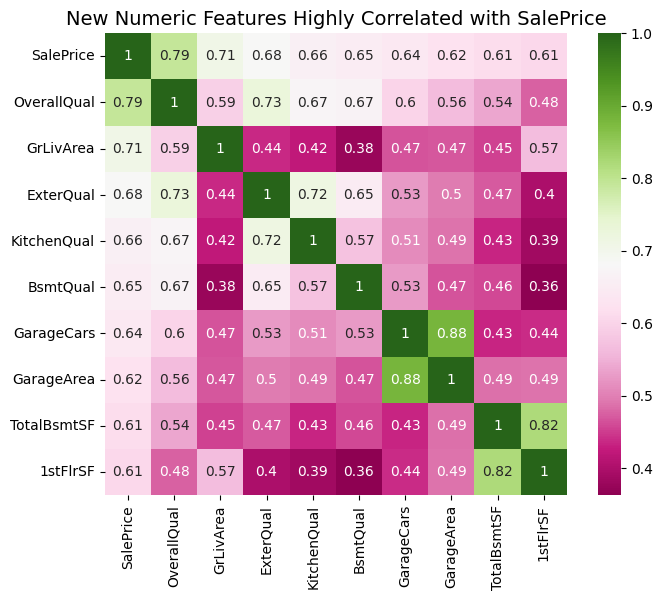

In [43]:
# Correlation matrix of df_train
corrmat = df_train_en.select_dtypes(include = np.number).corr()

# Number of variables for heatmap
k = 10

# k attributes that are highly correlated to SalePrice 
cols_high_corr = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Plot heatmap
f, ax = plt.subplots(figsize = (8, 6))
plt.title('New Numeric Features Highly Correlated with SalePrice', fontsize = 14)
sns.heatmap(df_train_en[cols_high_corr].corr(), vmax = 1, annot = True, square = True, cmap = "PiYG");

### 2.5 Feature Engineering

In [44]:
# Combine building related square feet
df_train_en['TotalSF'] = df_train_en['TotalBsmtSF'] + df_train_en['1stFlrSF'] + df_train_en['2ndFlrSF']

# Combine bathroom related features
df_train_en['TotalBath'] = df_train_en['FullBath'] + df_train_en['BsmtFullBath'] + 0.5 * df_train_en['HalfBath'] + 0.5 * df_train_en['BsmtHalfBath']

# Drop unnecessary columns after feature engineering
col_drop = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath']
df_train_en = df_train_en.drop(columns = col_drop)

### 2.6 Feature Scaling

> If there is a significant variation in scale among the features within a dataset, it can impact models that are sensitive to the scale of input features, such as linear regression, logistic regression, and neural networks. \
**Normalization**: is advantageous when the data distribution does not follow a Gaussian distribution.\
**Standardization**: is beneficial in situations where the data adheres to a Gaussian distribution, although this assumption is not always mandatory.

In [45]:
# Before scaling, let check the pairplot first
# sns.pairplot(df_train_en[cols_high_corr])

In [46]:
from sklearn.preprocessing import MinMaxScaler

df_train_scal = copy.copy(df_train_en)
df_train_scal = df_train_scal.drop(columns =['SalePrice', 'Id'])

# Create minmax scalar
minmax_scaler = MinMaxScaler().fit(df_train_scal.select_dtypes(include = np.number))

# Colunms of df_train_scal
col = df_train_scal.select_dtypes(include = np.number).columns

# Create df after scaling
df_train_scal = pd.DataFrame(minmax_scaler.transform(df_train_scal.select_dtypes(include = np.number)), columns = col)

# Attach Id and SalePrice back
df_train_scal['Id'] = df_train_en['SalePrice']
df_train_scal['SalePrice'] = df_train_en['SalePrice']

print(df_train_scal)

      MSSubClass  MSZoning   LotArea  Neighborhood  HouseStyle  OverallQual   
0       0.235294      0.75  0.033420      0.208333    0.714286     0.666667  \
1       0.000000      0.75  0.038795      1.000000    0.285714     0.555556   
2       0.235294      0.75  0.046507      0.208333    0.714286     0.666667   
3       0.294118      0.75  0.038561      0.250000    0.714286     0.666667   
4       0.235294      0.75  0.060576      0.625000    0.714286     0.777778   
...          ...       ...       ...           ...         ...          ...   
1455    0.235294      0.75  0.030929      0.333333    0.714286     0.555556   
1456    0.000000      0.75  0.055505      0.583333    0.285714     0.555556   
1457    0.294118      0.75  0.036187      0.250000    0.714286     0.666667   
1458    0.000000      0.75  0.039342      0.500000    0.285714     0.444444   
1459    0.000000      0.75  0.040370      0.291667    0.285714     0.444444   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrA

## 3 - Prepare the Training Dataset

**The Dataset We Have**

||df_train|df_train_en|df_train_scal|
|---|---|---|---|
|Handle Duplicates| O | O | O |
|Handle Missing Data| O | O | O |
|Encoding| X | O | O |
|Feature Scaling| X | X | O |

### 3.1 Remove Unneccessary Features

In [47]:
# Drop column Id which won't be used while training model
df_train = df_train.drop(['Id'], axis = 1)

In [48]:
# Drop column Id which won't be used while training model
df_train_en = df_train_en.drop(['Id'], axis = 1)

In [49]:
# Drop column Id which won't be used while training model
df_train_scal = df_train_scal.drop(['Id'], axis = 1)

### 3.2 Feature Selection

**Type 1: Raw Numerical Data**\
In type 1, we use original numeric data (without encoding and feature engineering) and drop columns that contain null values.

In [50]:
# Extract dataset that only includes numerical data
df_train_set_1 = df_train.select_dtypes(include = np.number)

# Check columns with null values
df_train_set_1.isnull().sum().sort_values(ascending = False)

MSSubClass       0
LotArea          0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtFinSF2       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
BsmtHalfBath     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
SalePrice        0
dtype: int64

In [51]:
df_train_set_1.shape

(1460, 36)

**Type 2: Complete New Numerical Data**\
In type 2, we use the dataset after encoding ordianl and nominal data, and feature engineering

In [52]:
# Define type 2 dataset
df_train_set_2 = df_train_en.select_dtypes(include = np.number)

In [53]:
df_train_set_2.shape

(1460, 40)

**Type 3: Top K New Numerical Data**\
Based on Type 2, we select top 20 features having stronger correlation with SalePrice for training

In [54]:
# k attributes that are highly correlated to SalePrice 
k = 20
corrmat = df_train_en.select_dtypes(include = np.number).corr()
cols_high_corr = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Define type 3 dataset
df_train_set_3 = df_train_en[cols_high_corr]

In [55]:
df_train_set_3.shape

(1460, 20)

**Type 4: Scale Features Based on Type 2**

In [56]:
df_train_set_4 = df_train_scal

In [57]:
df_train_set_4.shape

(1460, 40)

## 4 - Create, Train, and Test Model
### 4.1 Define Training and Validation Dataset

In [58]:
# Assign the training dataset
df_training = df_train_set_4

# List feature of training model
x_feature = list(df_training.drop(['SalePrice'], axis = 1).columns)

# Split the data into independent variable and dependent variable
x = df_training.drop(['SalePrice'], axis = 1)
y = df_training['SalePrice'] 

In [59]:
x.head()

,MSSubClass,MSZoning,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath
0,0.235294,0.75,0.033420,0.208333,0.714286,0.666667,0.500,0.949275,0.883333,0.12250,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.195481,0.5
1,0.000000,0.75,0.038795,1.000000,0.285714,0.555556,0.875,0.753623,0.433333,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.191802,0.3
2,0.235294,0.75,0.046507,0.208333,0.714286,0.666667,0.500,0.934783,0.866667,0.10125,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.207742,0.5
3,0.294118,0.75,0.038561,0.250000,0.714286,0.666667,0.500,0.311594,0.333333,0.00000,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.187336,0.2
4,0.235294,0.75,0.060576,0.625000,0.714286,0.777778,0.500,0.927536,0.833333,0.21875,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.263531,0.5


In [60]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

# Splitting the data into traing for building model and test for predicting and evaluation
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 121)

### 4.2 Build Linear Regression Method

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [65]:
x_train

,MSSubClass,MSZoning,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalBath
446,0.000000,0.75,0.071009,0.500000,0.285714,0.555556,0.625,0.681159,0.866667,0.000,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.454545,1.00,0.268961,0.3
1086,0.823529,1.00,0.003150,0.416667,0.714286,0.333333,0.500,0.731884,0.383333,0.000,...,0.175503,0.000000,0.000000,0.0000,0.0,0.0,0.363636,1.00,0.114206,0.1
716,0.294118,1.00,0.044404,0.708333,0.714286,0.666667,0.875,0.130435,0.800000,0.000,...,0.087751,0.259058,0.000000,0.0000,0.0,0.0,0.545455,0.25,0.257313,0.1
614,0.941176,1.00,0.000893,0.416667,0.857143,0.333333,0.625,0.724638,0.366667,0.000,...,0.043876,0.000000,0.000000,0.0000,0.0,0.0,0.363636,1.00,0.081100,0.2
352,0.176471,0.75,0.036383,0.291667,0.000000,0.444444,0.625,0.500000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.181818,0.50,0.122000,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.000000,0.75,0.051882,0.500000,0.285714,0.555556,0.750,0.623188,0.800000,0.110,...,0.000000,0.000000,0.000000,0.4875,0.0,0.0,0.454545,0.75,0.183570,0.0
65,0.235294,0.75,0.038753,0.666667,0.714286,0.777778,0.500,0.956522,0.916667,0.215,...,0.276051,0.000000,0.000000,0.0000,0.0,0.0,0.818182,0.25,0.287441,0.3
1288,0.588235,0.75,0.020398,0.916667,0.285714,0.777778,0.500,0.927536,0.833333,0.000,...,0.107861,0.000000,0.000000,0.0000,0.0,0.0,0.818182,0.75,0.247504,0.4
469,0.235294,0.75,0.037351,0.833333,0.714286,0.555556,0.500,0.876812,0.716667,0.075,...,0.127971,0.000000,0.000000,0.0000,0.0,0.0,0.454545,0.50,0.193379,0.3


In [66]:
model.intercept_

-34558.3592189636

In [67]:
model.coef_

array([-30434.16823916,  -7037.87072276,  58440.60712892,  14274.89364227,
        -8099.05344586, 108987.06296605,  43568.58470691,  20822.91253455,
        -4787.71210048,  41532.11173029,  32972.75520615,  37630.17293548,
        21692.78199212,  -4800.50695491,  -7383.04973139, -13189.98660121,
         4351.84021021,  -4124.89866907, 180073.7678303 , -43539.02998412,
       -33783.65627711,  31778.48792194,  54239.44496691,  15909.23128786,
       -17060.98691974,  -2012.28491828,  49340.53804696,  -7145.42231839,
        11267.80545826, -14785.74031871,  -4084.38771397,  21785.99930721,
        18206.93887427,  -9083.10676849,  -2396.36172968,  -1334.6189688 ,
        -2570.872185  ,  77894.77285198,  34960.28165378])

### 4.3 Evaluate Model with Validation Data

In [68]:
# Get prediction based on x_valid
y_pred = model.predict(x_valid)

In [69]:
from sklearn.metrics import r2_score

# Find R2 score
r2_score(y_valid, y_pred)

0.8760293769995084

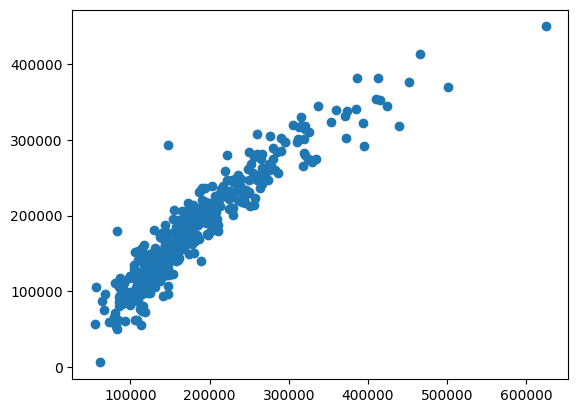

In [70]:
plt.scatter(y_valid, y_pred)

### 4.4 Performance Comparison

**Training Time Between w/ or w/o Feature Scaling**\
In this part, I will compare the training time required on type 2 (w/o scaling) and type 4 (w/ scaling) datasets. I only execute the following calculation once. Get average time would be much more reasonable.

In [72]:
import time

# Assign dataset for performance check 
pf_check_set = df_train_set_2

# List feature of training model
pf_x_feature = list(pf_check_set.drop(['SalePrice'], axis = 1).columns)

# Split the data into independent variable and dependent variable
pf_x = pf_check_set.drop(['SalePrice'], axis = 1)
pf_y = pf_check_set['SalePrice'] 

# Splitting the data into traing for building model and test for predicting and evaluation
pf_x_train, pf_x_valid, pf_y_train, pf_y_valid = train_test_split(pf_x, pf_y, test_size = 0.3, random_state = 121)

# Create model
pf_model = LinearRegression()

# For estimating training time
t0 = time.time()

# Training model
pf_model.fit(pf_x_train, pf_y_train)

# Print time consuming
print("Training time for Type 2 dataset:", time.time() - t0)

############################

# Assign dataset for performance check 
pf_check_set = df_train_set_4

# List feature of training model
pf_x_feature = list(pf_check_set.drop(['SalePrice'], axis = 1).columns)

# Split the data into independent variable and dependent variable
pf_x = pf_check_set.drop(['SalePrice'], axis = 1)
pf_y = pf_check_set['SalePrice'] 

# Splitting the data into traing for building model and test for predicting and evaluation
pf_x_train, pf_x_valid, pf_y_train, pf_y_valid = train_test_split(pf_x, pf_y, test_size = 0.3, random_state = 121)

# Create model
pf_model = LinearRegression()

# For estimating training time
t0 = time.time()

# Training model
pf_model.fit(pf_x_train, pf_y_train)

# Print time consuming
print("Training time for Type 4 dataset:", time.time() - t0)

Training time for Type 2 dataset: 0.006069660186767578
Training time for Type 4 dataset: 0.004525184631347656


**R2 Score Among Different Feature Selections**\
I intend to calculate every R2 score of every K which refers to the top k features having stronger correlation to SalePrice.

In [73]:
# Compare how different k impact R-squre result

k = df_train_en.select_dtypes(include = np.number).shape[1]
corrmat = df_train_en.select_dtypes(include = np.number).corr()
result = []
idx = []

for i in range(2, k + 2):
    pf_cols = corrmat.nlargest(i, 'SalePrice')['SalePrice'].index
    pf_check_set = df_train_en[pf_cols]
    pf_x_feature = list(pf_check_set.drop(['SalePrice'], axis = 1).columns)
    pf_x = pf_check_set.drop(['SalePrice'], axis = 1)
    pf_y = pf_check_set['SalePrice'] 
    pf_x_train, pf_x_valid, pf_y_train, pf_y_valid = train_test_split(pf_x, pf_y, test_size = 0.3, random_state = 121)
    pf_model = LinearRegression()
    pf_model.fit(pf_x_train, pf_y_train)
    pf_y_pred = pf_model.predict(pf_x_valid)
    result.append(r2_score(pf_y_valid, pf_y_pred))
    idx.append(i)

In [74]:
# Create R2 table
r2_table = pd.DataFrame(
    { 'K': idx,
      'R2': result
    })

<Axes: xlabel='K', ylabel='R2'>

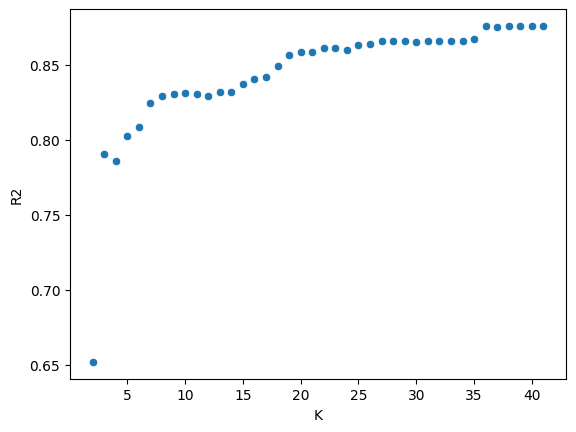

In [75]:
# Plot K and R2
sns.scatterplot(data = r2_table, x = "K", y = "R2")

## 5 - Predict SalePrice and Submit

### 5.1 Process Test Data Before Use

**Handle Missing Data and Duplicates**

In [76]:
df_test.duplicated().sum()

0

In [77]:
# Count null numbers and percentage
total = df_test.isnull().sum().sort_values(ascending = False)
percent = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending = False)

# List null numbers in order
missing_table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_table.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
MasVnrType,894,0.612748
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461


In [78]:
# Drop columnns with null values more than 10% of data
df_test = df_test.loc[:, df_test.isnull().sum() < 0.1 * df_test.shape[0]]

In [79]:
# Fill null values with the most frequent value of the column for BsmtExposure, BsmtQual and GarageFinish
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].value_counts().index[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].value_counts().index[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test["GarageFinish"].value_counts().index[0])

# Fill GarageYrBlt with value in YearBuilt
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['YearBuilt'])

# Fill null values with the mean of the column
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [81]:
# print("Null count of numerical features\n", df_test.select_dtypes(include = np.number).isnull().sum())
# print("\nNull count of object features\n", df_test.select_dtypes(exclude = np.number).isnull().sum())

In [82]:
# Fillna for numerical data (These features have no null values in training set)
# TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea

# Fill TotalBsmtSF with 1stFlrSF
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['1stFlrSF'])

# Fill BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea with 0
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)

# Fill null values of object data (no null values occur in training set)
# MSZoning, KitchenQual

# Fill with most frequent values
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].value_counts().index[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].value_counts().index[0])

In [83]:
# print("Null count of numerical features\n", df_test.select_dtypes(include = np.number).isnull().sum())
# print("\nNull count of object features\n", df_test.select_dtypes(exclude = np.number).isnull().sum())

In [84]:
# Numeric features
col_num = df_test.select_dtypes(include = np.number).columns

# Fillna 0 for rest of numeric columns
df_test[col_num] = df_test[col_num].fillna(0)

**Feature Encoding**\
Skip this part if df_train_set_1 is used for training.

In [85]:
# Select columns of similar ordinal type
col_ord = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']

# Encode Ordinal Attributes with customized order
enc = OrdinalEncoder(categories = [['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Encode the attribute
for i in col_ord:
    df_test[i] = enc.fit_transform(asarray(df_test[i]).reshape(-1, 1))

# Other ordinal data to be encoded: BsmtExposure
enc = OrdinalEncoder(categories = [['NA', 'No', 'Mn', 'Av', 'Gd']])
df_test['BsmtExposure'] = enc.fit_transform(asarray(df_test['BsmtExposure']).reshape(-1, 1))
# Create list of nominal data
col_nomi = ['HouseStyle', 'GarageFinish', 'MSZoning', 'Neighborhood']

# Create instance of labelencoder
le = LabelEncoder()

for i in col_nomi:
    # Transfer attribute as category datatype before transform
    df_test[i] = df_test[i].astype('category')
    # Assigning numerical values and storing in column
    df_test[i] = le.fit_transform(df_test[i])

**Feature Engineering**\
Skip this part if df_train_set_1 is used for training

In [86]:
# Combine building related square feet
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

# Combine bathroom related features
df_test['TotalBath'] = df_test['FullBath'] + df_test['BsmtFullBath'] + 0.5 * df_test['HalfBath'] + 0.5 * df_test['BsmtHalfBath']

**Align Features of Test Set with Training Set**

In [87]:
# List feature used in training model
x_features = list(df_training.drop(['SalePrice'], axis = 1).columns)

# Select same columns as training set
df_test = df_test[x_features]

**Feature Scaling**\
Do the same scaling on test data when df_train_set_4 is used for training

In [88]:
# Use the same scaler as training set
df_test = pd.DataFrame(minmax_scaler.transform(df_test), columns = x_features)

### 5.2 Predict SalePrice

In [89]:
# Make predictions on the test set
pred_test = model.predict(df_test)
pred_test

array([110632.43416666, 156067.31079807, 161520.83721491, ...,
       158277.5854135 , 105161.7770039 , 245596.26947012])

### 5.3 Submit Predicted Results

In [90]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = pred_test
sample_submission.to_csv('submission.csv', index = False)
sample_submission.head()

,Id,SalePrice
0,1461,110632.434167
1,1462,156067.310798
2,1463,161520.837215
3,1464,181889.022399
4,1465,194630.040623


## 6 - Conclusion
Need to address later
- Cope with Outlier
- Different Model Selections